# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    city_response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_response["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response["coord"]["lat"]
        city_lng = city_response["coord"]["lon"]
        city_max_temp = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_clouds = city_response["clouds"]["all"]
        city_wind = city_response["wind"]["speed"]
        city_country = city_response["sys"]["country"]
        city_date = city_response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabinda
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | tommot
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | gat
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | requena
Processing Record 9 of Set 1 | aksarka
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | vrangel
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | viligili
City not found. Skipping...
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | illapel
Processing Record 20 of Set 1 | ostrovnoy
Processing Record 21 of Set 1 | belushya gu

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cabinda,-5.5500,12.2000,75.74,88,100,4.07,AO,1670380427
1,port elizabeth,-33.9180,25.5701,57.49,96,0,3.44,ZA,1670380428
2,tommot,58.9564,126.2925,-4.58,92,98,5.53,RU,1670380428
3,mataura,-46.1927,168.8643,63.48,35,8,8.37,NZ,1670380429
4,barrow,71.2906,-156.7887,15.82,86,100,21.85,US,1670380365


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [76]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabinda,-5.5500,12.2000,75.74,88,100,4.07,AO,1670380427
1,port elizabeth,-33.9180,25.5701,57.49,96,0,3.44,ZA,1670380428
2,tommot,58.9564,126.2925,-4.58,92,98,5.53,RU,1670380428
3,mataura,-46.1927,168.8643,63.48,35,8,8.37,NZ,1670380429
4,barrow,71.2906,-156.7887,15.82,86,100,21.85,US,1670380365


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

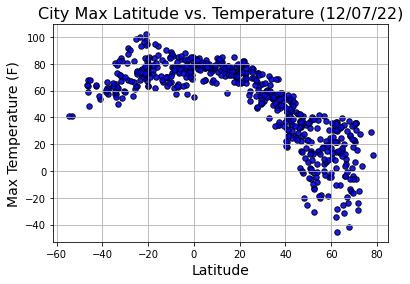

In [9]:
# Build scatter plot for latitude vs. temperature
ts = time.gmtime(city_data_df["Date"][0])
datestr = time.strftime("%x", ts)
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black",s=30, alpha=.90)
plt.grid()
plt.title(f"City Max Latitude vs. Temperature ({datestr})",fontsize= 16)
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Max Temperature (F)',fontsize =14)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

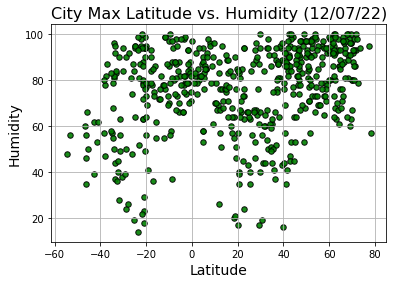

In [10]:
# Build the scatter plots for latitude vs. humidity
ts = time.gmtime(city_data_df["Date"][0])
datestr = time.strftime("%x", ts)
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o", facecolors="green", edgecolors="black",s=30, alpha=.90)
plt.grid()
plt.title(f"City Max Latitude vs. Humidity ({datestr})", fontsize=16)
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Humidity',fontsize =14)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

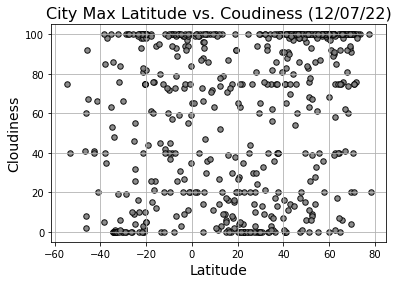

In [11]:
# Build the scatter plots for latitude vs. cloudiness
ts = time.gmtime(city_data_df["Date"][0])
datestr = time.strftime("%x", ts)
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o", facecolors="grey", edgecolors="black",s=30, alpha=.90)
plt.grid()
plt.title(f"City Max Latitude vs. Coudiness ({datestr})",fontsize = 16)
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Cloudiness',fontsize =14)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

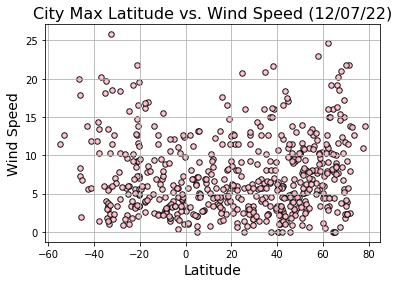

In [12]:
# Build the scatter plots for latitude vs. wind speed
ts = time.gmtime(city_data_df["Date"][0])
datestr = time.strftime("%x", ts)
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o", facecolors="pink", edgecolors="black",s=30, alpha=.90)
plt.grid()
plt.title(f"City Max Latitude vs. Wind Speed ({datestr})",fontsize = 16)
plt.xlabel('Latitude',fontsize =14)
plt.ylabel('Wind Speed',fontsize =14)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def plotLinearRegression(xdata, ydata, xlbl, ylbl, lblpos, ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    #printing rvalue
    print(f"r-squared = {rvalue}")
    
    regress_values = xdata * slope + intercept
    line_eq=f"y = {round(slope, 2)} x + {round(intercept, 2)}"
    
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"../output_data/fig{ifig}.png")
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = []
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tommot,58.9564,126.2925,-4.58,92,98,5.53,RU,1670380428
4,barrow,71.2906,-156.7887,15.82,86,100,21.85,US,1670380365
5,gat,31.6100,34.7642,59.40,84,9,5.59,IL,1670380262
7,requena,39.4883,-1.1004,48.79,89,100,2.82,ES,1670380430
8,aksarka,66.5606,67.7975,8.60,88,100,11.61,RU,1670380431


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = []
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cabinda,-5.5500,12.2000,75.74,88,100,4.07,AO,1670380427
1,port elizabeth,-33.9180,25.5701,57.49,96,0,3.44,ZA,1670380428
3,mataura,-46.1927,168.8643,63.48,35,8,8.37,NZ,1670380429
6,rikitea,-23.1203,-134.9692,75.42,81,10,19.15,PF,1670380430
13,cape town,-33.9258,18.4232,60.12,81,0,3.00,ZA,1670380393


###  Temperature vs. Latitude Linear Regression Plot

r-squared = -0.8461505086784574


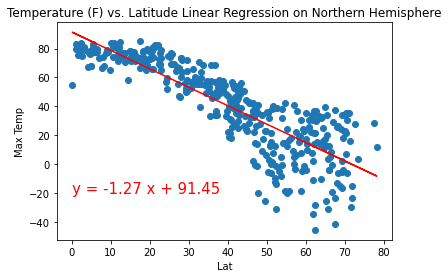

In [38]:
# Linear regression on Northern Hemisphere

xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,-20)
plt.title("Temperature (F) vs. Latitude Linear Regression on Northern Hemisphere")
plotLinearRegression(northern_hemi_df[xlbl],northern_hemi_df[ylbl],xlbl,ylbl,lblpos,5)

r-squared = 0.4303540386560679


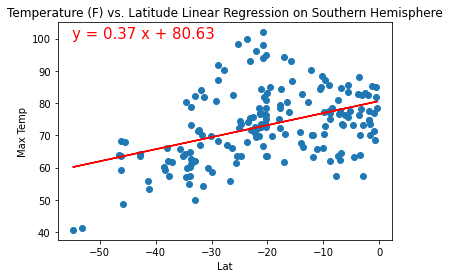

In [51]:
# Linear regression on Southern Hemisphere
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,100)
plt.title("Temperature (F) vs. Latitude Linear Regression on Southern Hemisphere")
plotLinearRegression(southern_hemi_df[xlbl],southern_hemi_df[ylbl],xlbl,ylbl,lblpos,5)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r-squared = 0.28905695075852106


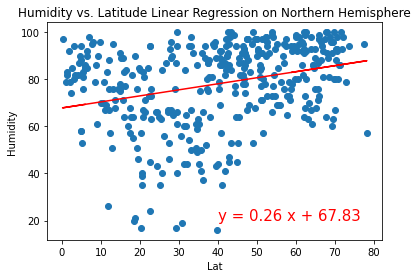

In [52]:
# Northern Hemisphere
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (40,20)
plt.title("Humidity vs. Latitude Linear Regression on Northern Hemisphere")
plotLinearRegression(northern_hemi_df[xlbl],northern_hemi_df[ylbl],xlbl,ylbl,lblpos,5)

r-squared = 0.3675848647248953


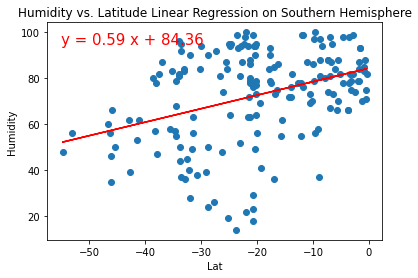

In [58]:
# Southern Hemisphere
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-55,95)
plt.title("Humidity vs. Latitude Linear Regression on Southern Hemisphere")
plotLinearRegression(southern_hemi_df[xlbl],southern_hemi_df[ylbl],xlbl,ylbl,lblpos,5)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r-squared = 0.3133769026735245


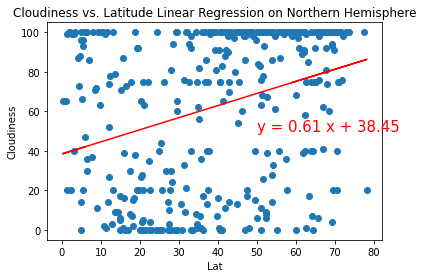

In [63]:
# Northern Hemisphere
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (50,50)
plt.title("Cloudiness vs. Latitude Linear Regression on Northern Hemisphere")
plotLinearRegression(northern_hemi_df[xlbl],northern_hemi_df[ylbl],xlbl,ylbl,lblpos,5)

r-squared = 0.25571676258674375


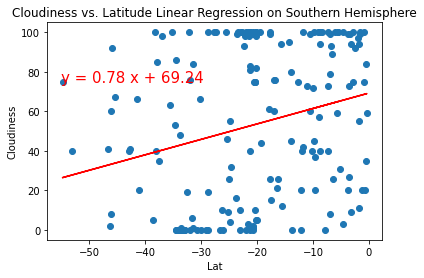

In [66]:
# Southern Hemisphere
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,75)
plt.title("Cloudiness vs. Latitude Linear Regression on Southern Hemisphere")
plotLinearRegression(southern_hemi_df[xlbl],southern_hemi_df[ylbl],xlbl,ylbl,lblpos,5)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r-squared = 0.21853842555095493


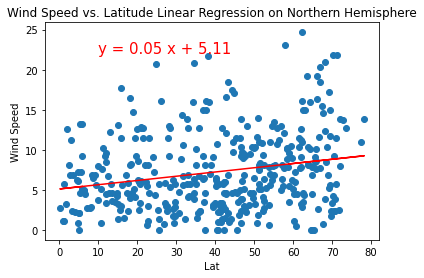

In [70]:
# Northern Hemisphere
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (10,22)
plt.title("Wind Speed vs. Latitude Linear Regression on Northern Hemisphere")
plotLinearRegression(northern_hemi_df[xlbl],northern_hemi_df[ylbl],xlbl,ylbl,lblpos,5)

r-squared = -0.26225037389274924


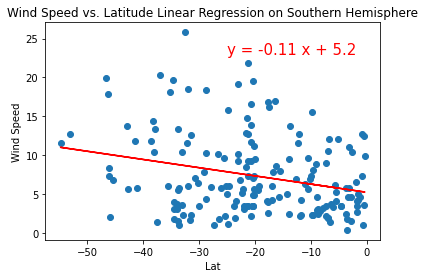

In [75]:
# Southern Hemisphere
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-25,23)
plt.title("Wind Speed vs. Latitude Linear Regression on Southern Hemisphere")
plotLinearRegression(southern_hemi_df[xlbl],southern_hemi_df[ylbl],xlbl,ylbl,lblpos,5)

**Discussion about the linear relationship:** YOUR RESPONSE HERE